
# Introduction to Machine Learning: Supervised Learning Final Project
## Ocean Acidification Prediction Using Machine Learning Algorithms  


**Github link**
https://github.com/conditas/MachineLearning/tree/main/ocean_chem

A growing concern in climate change and environmental science is ocean acidification. The ocean absorbs around 30 percent of the world's carbon dioxide emissions. Carbon dioxide in the air is dissolved into ocean water where it is broken into hydrogen ions and bicarbonate. This reaction in turn decreases the pH of the ocean, making it more acidic. An increase in ocean acidity posses a threat to marine life and biological processes. Over the last two decades, the National Ocean and Atmospheric Administration has set up carbon dioxide and pH monitoring systems on research cruise ships and water buoy observation stations along coastlines to gain a greater understanding of this issue. 

Being able to predict and forecast ocean acidity trends could have a useful impact on environmental policy and research. In my project I will compare the performance of three different machine learning regression algorithms in using ocean chemistry data to predict pH levels. I will compare Linear Regression, Gradient Boosting Regression and Decision Tree Regression algorithms.


### Import Libraries

The following libraries will be used in my project.

In [285]:
###############
# Importing Libraries used for the project
###############

%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance




### Load Data

There are many ocean water quality sensors worldwide. The National Oceanic and Atmospheric Administration's website provide freely accessible data from many of these sensors. In order to have more consistency in data and a manageable yet meaningful size, I chose sensor data from one station, near La Parguera, Puerto Rico.     

I pulled my data files from the NOAA's website under the National Centers for Environmental Information section. These files contained chemical, meteorological, physical and time sensor information from the La Parguera mooring located at 67W 18N in the Caribbean Sea near La Parguera, Puerto Rico.  

The data I retrieved was in the form of csv files that were broken into approximately 12 month spans with several sensor readings per day. I downloaded files starting from Dec 2012 (when the pH sensor was installed) until the most current, Oct 2021. The data totaled 5.2 MB in size. I stored the files in one folder and merged them into a single data frame. This dataframe had 29 columns and 22535 rows. The code below shows a summary of the column names and data types for the intial dataset. 

The features I will be most interested in this analysis are:

Temperature- due to its ability to impact gas (such as CO2) concentrations in water.
Salinity- the salt concentration can affect the alkalinity (basic-ness) of the water.
Dissolved Oxygen- impacts the chemical process.
PH- measures the level of acidity, ranges from 0-14, lower numbers being more acidic.
Partial pressure of CO2- relates to the concentration of CO2 in water or air.
Chlorophyll- also has the ability to absorb carbon dioxide.

**Data Source Citation:** 


        Sutton, Adrienne J.; Sabine, Christopher L.; Morell, Julio M.; Musielewicz, Sylvia; Maenner Jones, Stacy; Dietrich, Colin; Bott, Randy; Osborne, John (2014). High-resolution ocean and atmosphere pCO2 time-series measurements from mooring La_Parguera_67W_18N in the Caribbean Sea (NCEI Accession 0117354). NOAA National Centers for Environmental Information. Dataset. https://doi.org/10.3334/cdiac/otg.tsm_la_parguera_67w_18n. Accessed Aug 3, 2024.

In [317]:
##############################################
# Load CSV files and merge into one data frame
##############################################

df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "ocean data/La_Parguera_67W_18N_*.csv"))))
df.head()

print("Original Data Frame Length:", len(df))
print(df.dtypes)



Original Data Frame Length: 22525
Mooring Name                  object
Latitude                     float64
Longitude                    float64
Date                          object
Time                          object
xCO2 SW (wet) (umol/mol)     float64
CO2 SW QF                      int64
H2O SW (mmol/mol)            float64
xCO2 Air (wet) (umol/mol)    float64
CO2 Air QF                     int64
H2O Air (mmol/mol)           float64
Licor Atm Pressure (hPa)     float64
Licor Temp (C)               float64
MAPCO2 %O2                   float64
SST (C)                      float64
Salinity                     float64
xCO2 SW (dry) (umol/mol)     float64
xCO2 Air (dry) (umol/mol)    float64
fCO2 SW (sat) (uatm)         float64
fCO2 Air (sat) (uatm)        float64
dfCO2                        float64
pCO2 SW (sat) (uatm)         float64
pCO2 Air (sat) (uatm)        float64
dpCO2                        float64
pH (total scale)             float64
pH QF                          int64
CHL 

### Clean Data

I removed several columns such as location, date/time, mooring name, and other features that seemed redundant or unnecessary for modeling pH. Missing values were encoded as -999 in the files. I converted these to NA's and then dropped any rows that contained NA. This removal of rows containing NA had a drastic impact on the number of rows, reducing it from 22535 down to 2197. However, this was still large enough for modeling purposes. I also cleaned up column names in order to make it easier to work with the parameters. I viewed the statistical description of the data and created boxplots to confirm that significant outliers didn't exist. The final data frame contained 2197 rows with the following columns:

|Variable |	Description|
|:---------|:-------------|
|pCO2_SW 	|Partial Pressure of CO2 in sea water|
|pCO2_Air |	CO2 of air four feet above sea level|
|SST |	Sea Surface Temperature|
|Salinity |	Portion of salt in water|
|CHL |	Total Chlorophyll|
|DOXY |	Dissolved Oxygen|
|pH |	pH measurement of ocean water|


cleaned length 1569
           pCO2_SW     pCO2_Air          SST     Salinity           pH   
count  1569.000000  1569.000000  1569.000000  1569.000000  1569.000000  \
mean    423.026769   399.988082    28.071955    35.464212     8.024362   
std      29.737656     7.702659     1.056878     0.690416     0.029680   
min     376.500000   377.900000    26.196000    33.261000     7.889000   
25%     401.000000   394.500000    27.159000    35.044000     8.005000   
50%     417.800000   399.800000    28.056000    35.589000     8.030000   
75%     435.600000   405.200000    28.944000    35.971000     8.048000   
max     569.000000   426.600000    30.803000    36.613000     8.092000   

               CHL         DOXY  
count  1569.000000  1569.000000  
mean      0.501581   180.855131  
std       0.442574    19.956333  
min       0.012000   125.000000  
25%       0.225000   171.400000  
50%       0.332000   186.400000  
75%       0.594000   195.800000  
max       2.778000   214.300000  


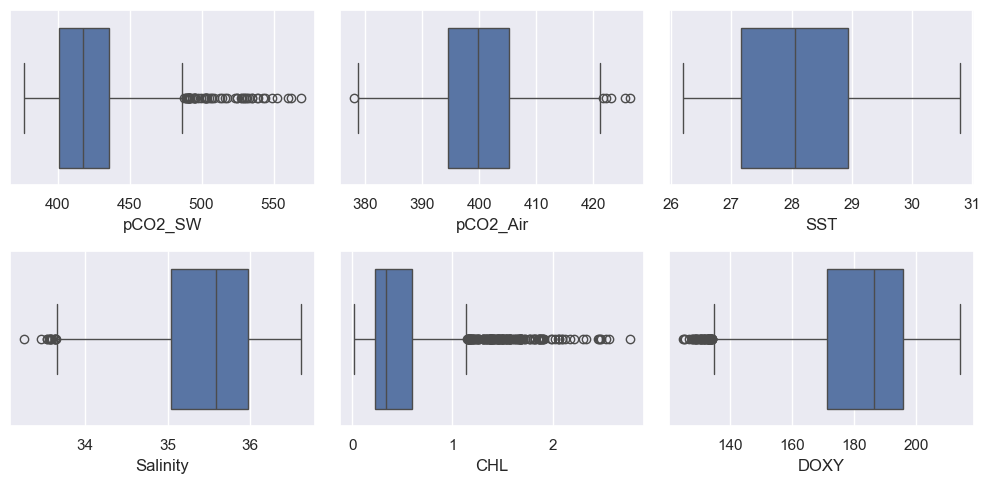

In [287]:
###################
# Cleaning the data
###################

# replace bad value with na
df = df.replace(to_replace = -999,value = np.nan)

# removed date, location, mooring, etc
# selecting only features needed for project
# and renaming columns

df_new = df[['pCO2 SW (sat) (uatm)','pCO2 Air (sat) (uatm)','SST (C)', 'Salinity', 'pH (total scale)', 'CHL (ug/l)', 'DOXY (umol/kg)']].copy()
df_new.rename(columns={'pCO2 SW (sat) (uatm)': 'pCO2_SW','pCO2 Air (sat) (uatm)':'pCO2_Air','SST (C)':'SST', 'pH (total scale)':'pH','CHL (ug/l)':'CHL', 'DOXY (umol/kg)':'DOXY'}, inplace=True)

#drop any na's
df_new = df_new.dropna()
print("cleaned length", len(df_new))

#print stats summary to catch any usual data points
print(df_new.describe())

# look for outliers with boxplot
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

# Plot on the first subplot
sns.boxplot(data=df_new, x="pCO2_SW", ax=axes[0,0])
sns.boxplot(data=df_new, x="pCO2_Air", ax=axes[0,1])
sns.boxplot(data=df_new, x="SST", ax=axes[0,2])
sns.boxplot(data=df_new, x="Salinity", ax=axes[1,0])
sns.boxplot(data=df_new, x="CHL", ax=axes[1,1])
sns.boxplot(data=df_new, x="DOXY", ax=axes[1,2])

plt.tight_layout()

# show the plot
plt.show()



### Exploratory Data Analysis

In my exploratory data analysis, I created a correlation graph and pairwise bivariate plots. The correlation graph shows the strongest correlation being between the pCO2_SW (partial pressure of CO2 in sea water) and pH (-0.84). Another strong correlation is pCO2_SW and SST (sea surface temperature) (0.73), so this will be taken into consideration in the model. DOXY (dissolved oxygen) also shows some correlation with pH (0.53). The pairwise plot also shows a strong negative relationship between the partial pressure of the sea water (pCO2_SW) and the pH. As seawater CO2 increases, pH (acidity) decreases. A similar trend is seen with sea surface temperature (SST). The dissolved oxygen has a positive relationship. As dissolved O2 increased, pH increases. It's a little hard to see significant relationships between other features. 

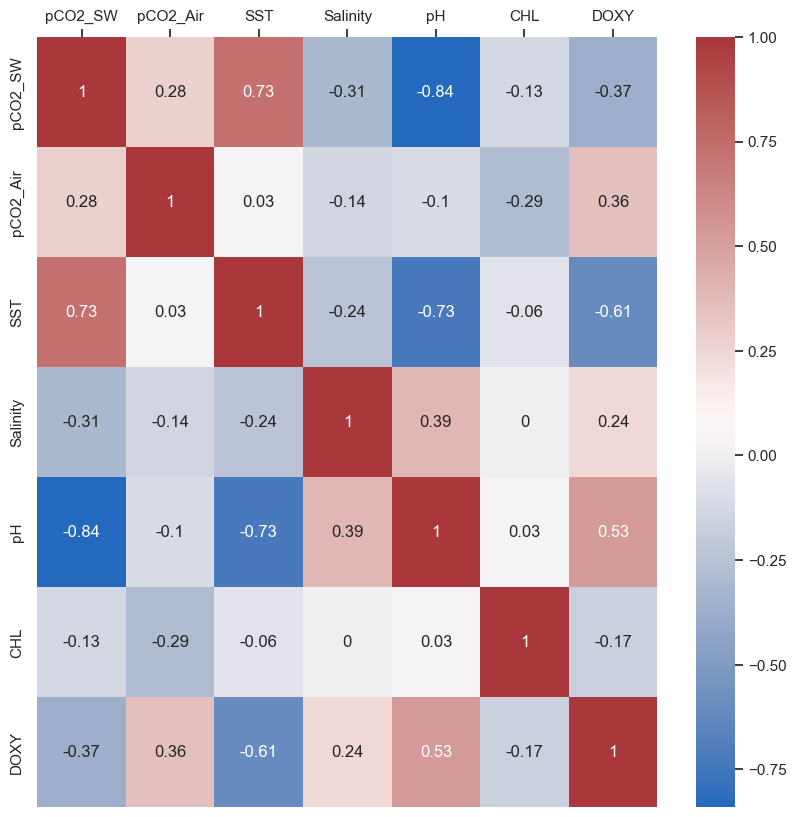

<Figure size 2000x2500 with 0 Axes>

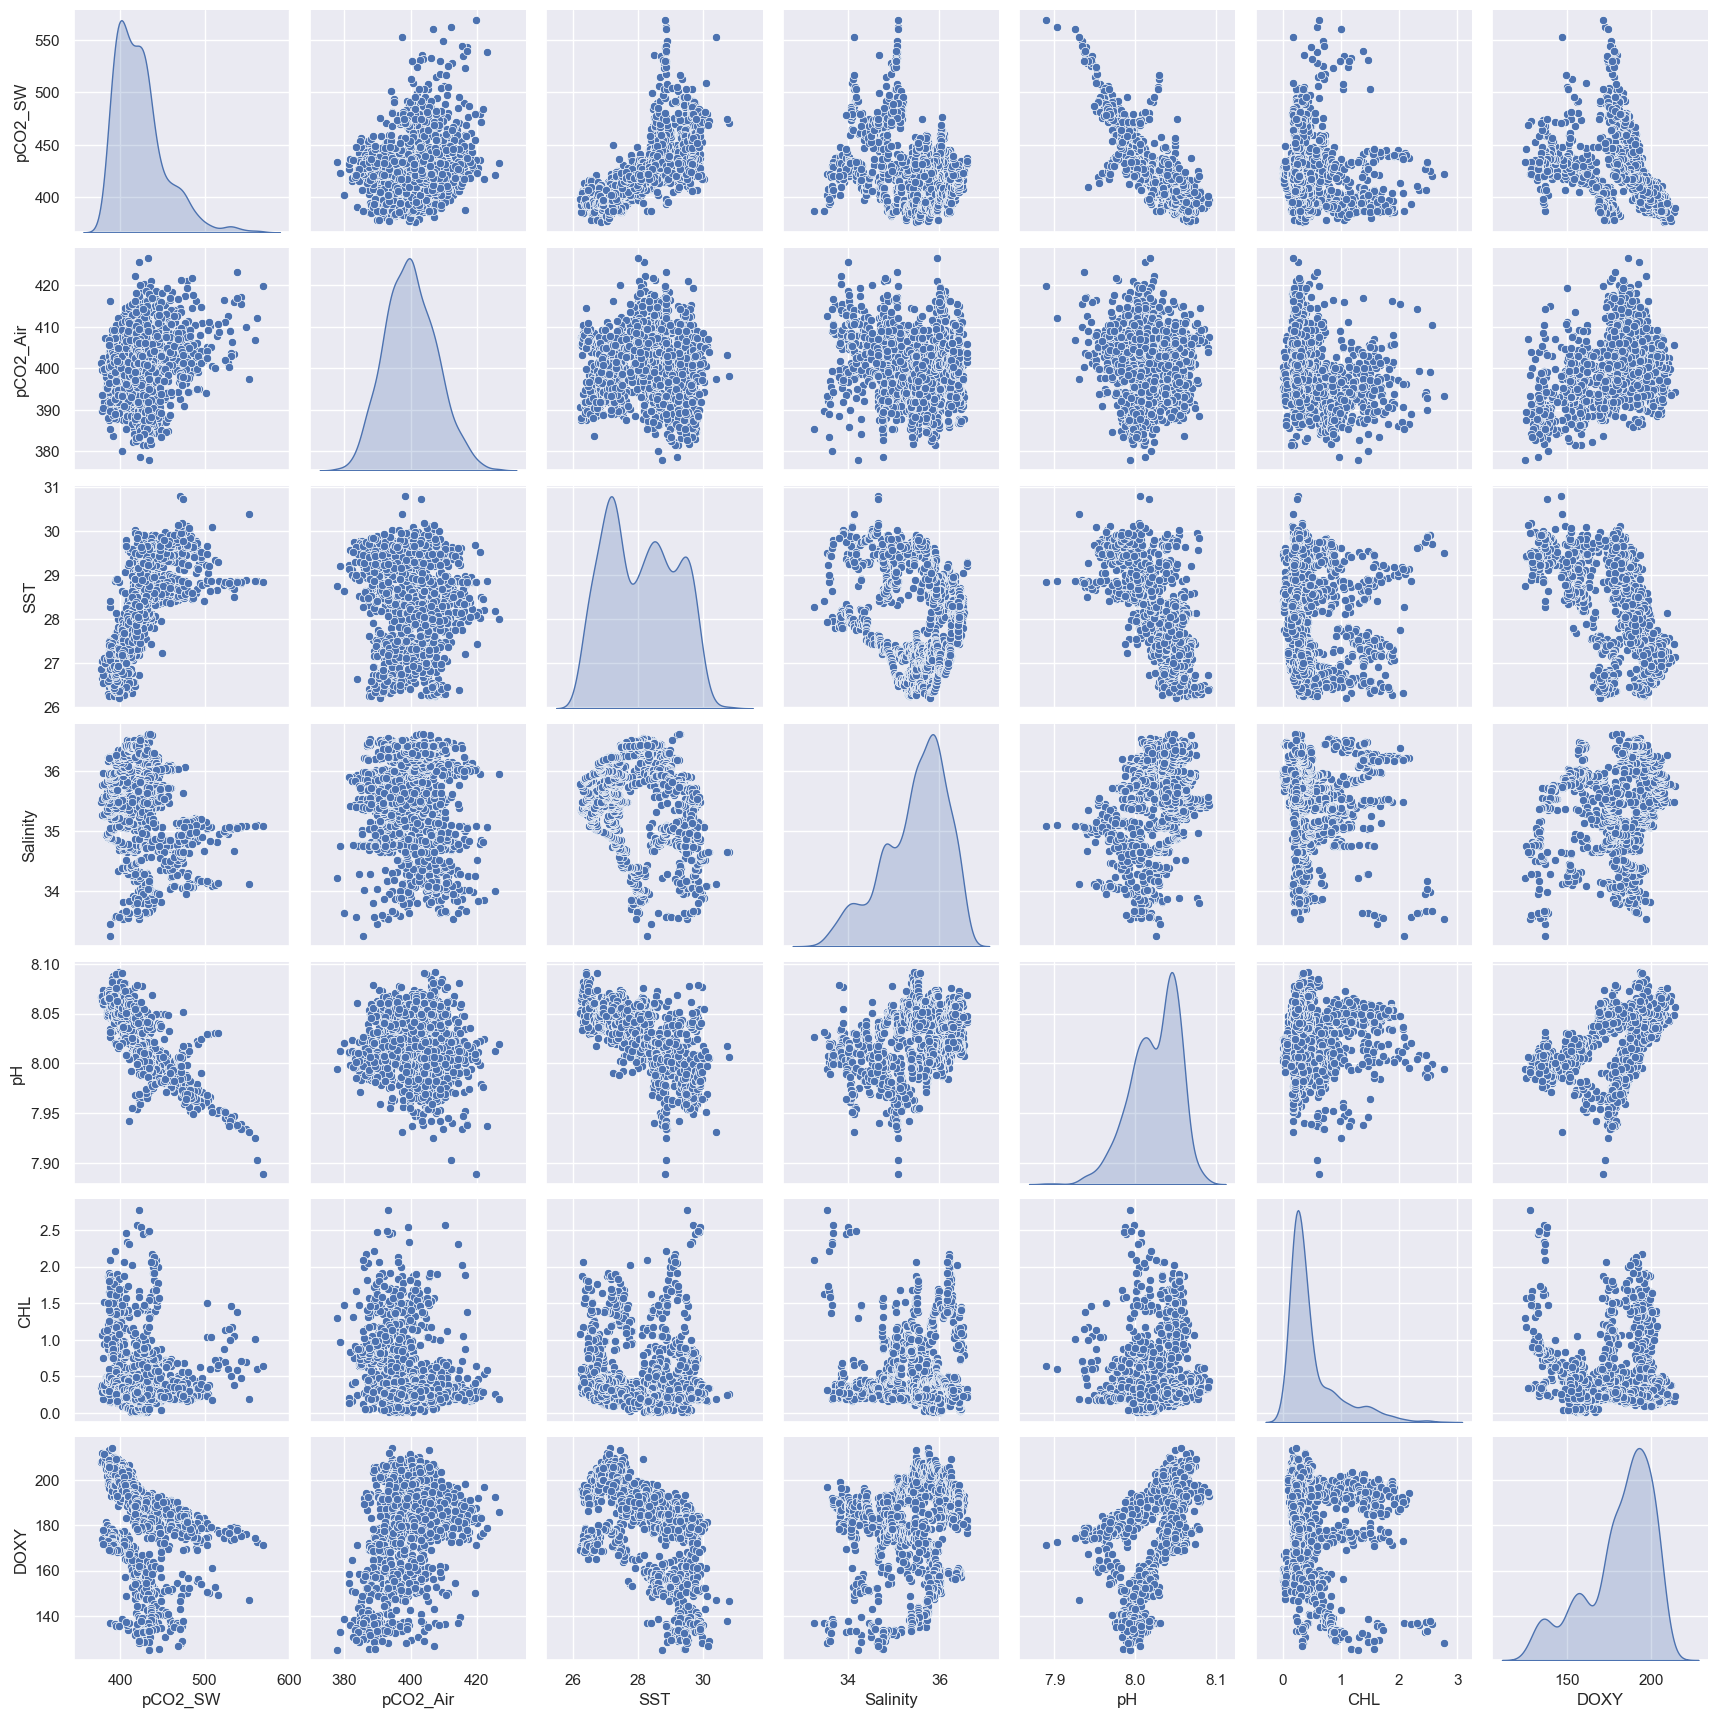

In [189]:
##############
# EDA
#############

# Correlation Matrix
matrix = df_new.corr().round(2)
plt.figure(figsize = (10,10))
heatmap = sns.heatmap(matrix, annot=True, cmap = 'vlag') 
heatmap.xaxis.tick_top()

# Pairwise plot
plt.figure(figsize = (20,25))
pairplot = sns.pairplot(df_new, diag_kind = 'kde')




### Models

In this project I compared three different types of regression models to make predictions. Before running the models I did an 80/20 split of the data into train and test datasets. Below I created regression models using statsmodels and sklearn. I used Linear, Decision Tree and Gradient Boost Regression algorithms.


**Linear Regression**


I initially ran a linear regression model for all features. In the full model, the CHL (chlorophyll) feature had a p-value > 0.05 and can be considered insignificant. I removed CHL and also the SST feature due the the colinearity seen in the EDA above. These were removed from the test and training sets and were not used for the proceeding algorithms as well (done in next block of code). I looked at several model options with the remaining features and compared the adjusted R squared values. The model with the best adjusted R-squared was one that included the features: pCO2_SW, pCO2_Air, Salinity and DOXY. I then plotted partial regression plots that model relationships between pH and a single parameter while keeping the parameters constant.  


                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     725.1
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:50:24   Log-Likelihood:                 3584.0
No. Observations:                1255   AIC:                            -7154.
Df Residuals:                    1248   BIC:                            -7118.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0991      0.036    223.136      0.0

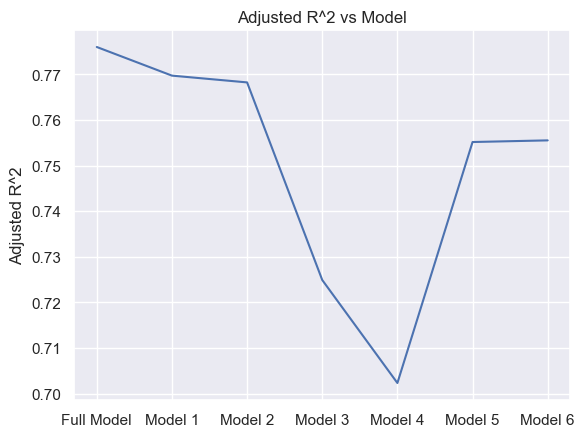

                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1049.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:50:24   Log-Likelihood:                 3565.6
No. Observations:                1255   AIC:                            -7121.
Df Residuals:                    1250   BIC:                            -7096.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0114      0.033    239.581      0.0

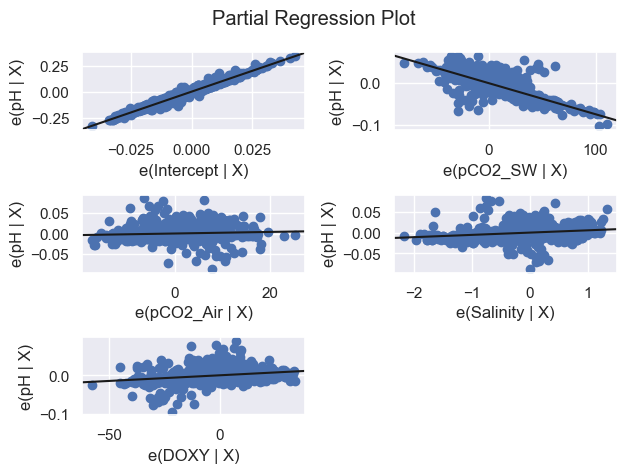

In [340]:
#############
# Modeling 
#############

#create test and training data
train_ocean, test_ocean = train_test_split(df_new, train_size = 0.8, random_state = 0 )

#slpit y (pH) data apart
train_ocean_y = train_ocean["pH"]
train_ocean_x = train_ocean.drop("pH", axis=1)

test_ocean_y = test_ocean["pH"]
test_ocean_x = test_ocean.drop("pH", axis=1)

##########################
# Linear Regression
##########################

model_full = smf.ols(formula = 'pH ~ pCO2_SW+pCO2_Air+SST+Salinity+CHL+DOXY', data=train_ocean).fit()
print(model_full.summary())
print()


# Calculate Adjusted R-squared for different model options
print("Full Model R2:" ,model_full.rsquared_adj)

model_1 = smf.ols(formula = 'pH ~ pCO2_SW+pCO2_Air+Salinity+DOXY', data=train_ocean).fit()
print("Model 1 Adj R2: ", model_1.rsquared_adj)
model_2 = smf.ols(formula = 'pH ~ pCO2_SW+Salinity+DOXY', data=train_ocean).fit()
print("Model 2 Adj R2: ", model_2.rsquared_adj)
model_3 = smf.ols(formula = 'pH ~ pCO2_SW+Salinity', data=train_ocean).fit()
print("Model 3 Adj R2: ", model_3.rsquared_adj)
model_4 = smf.ols(formula = 'pH ~ pCO2_SW', data=train_ocean).fit()
print("Model 4 Adj R2: ", model_4.rsquared_adj)
model_5 = smf.ols(formula = 'pH ~ pCO2_SW+DOXY', data=train_ocean).fit()
print("Model 5 Adj R2: ", model_5.rsquared_adj)
model_6 = smf.ols(formula = 'pH ~ pCO2_SW+pCO2_Air+DOXY', data=train_ocean).fit()
print("Model 6 Adj R2: ", model_6.rsquared_adj)


x = ["Full Model", "Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model 6"]
adjr2_train = [model_full.rsquared_adj, model_1.rsquared_adj, model_2.rsquared_adj, model_3.rsquared_adj,  model_4.rsquared_adj, model_5.rsquared_adj, model_6.rsquared_adj]


# Plotting Different Model Adj R squared
plt.plot(x, adjr2_train)
plt.ylabel("Adjusted R^2")
plt.title("Adjusted R^2 vs Model")
plt.show()


# Using Best Model to Predict and Evaluate Test Data  
y_lm_pred_train = model_1.predict(train_ocean_x)
y_lm_pred_test = model_1.predict(test_ocean_x)

# Calculate R-squared
r2_lm_train = r2_score(train_ocean_y , y_lm_pred_train)
r2_lm_test = r2_score(test_ocean_y , y_lm_pred_test)

# Calculate Mean Squared Error
mse_lm_train = mean_squared_error(train_ocean_y, y_lm_pred_train)
mse_lm_test = mean_squared_error(test_ocean_y, y_lm_pred_test)

#Print Chosen model summary 
print(model_1.summary())

#Plotting Partial Regression Plots 
fig = sm.graphics.plot_partregress_grid(model_1)
fig.tight_layout(pad=1.0)


print()
print()
print("Linear Regression:")
print('Train Mean Squared Error:', mse_lm_train)
print('Train R-squared:', r2_lm_train)
print('Test Mean Squared Error:', mse_lm_test)
print('Test R-squared:', r2_lm_test)

**Decision Tree Regression**

Next I created a Decision Tree Regression model. I set a max depth of 5 and used the default criterion of squared error. I calculated the mean squared error for the training and testing datasets. I also created Feature and Permutation Importance charts.  


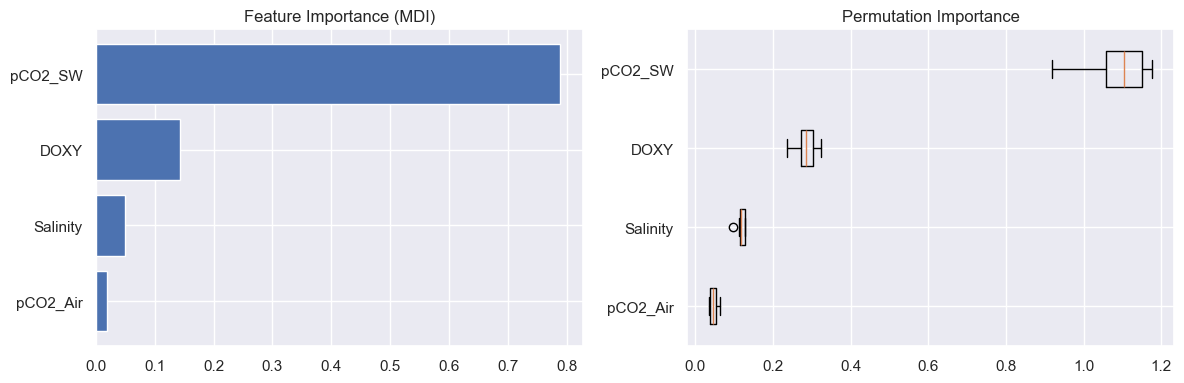

Decision Tree Regression:
Train Mean Squared Error: 9.398634562506831e-05
Train R-squared: 0.8918124057353458
Test Mean Squared Error: 0.00023353813142905152
Test R-squared: 0.7461937497834324


In [314]:

##########################
# Decision Tree Regression
##########################

## drop SST and CHL due to colinearity and low significance 
##
train_ocean_x = train_ocean_x.drop(['SST', 'CHL'], axis=1)
test_ocean_x = test_ocean_x.drop(['SST', 'CHL'], axis=1)


dtr = tree.DecisionTreeRegressor(max_depth=5)
dtr = dtr.fit(train_ocean_x, train_ocean_y)

# Predict using train/test data
y_dtr_pred_train = dtr.predict(train_ocean_x)
y_dtr_pred_test = dtr.predict(test_ocean_x)


# Calculate Mean Squared Error
mse_dtr_train = mean_squared_error(train_ocean_y , y_dtr_pred_train)
mse_dtr_test = mean_squared_error(test_ocean_y, y_dtr_pred_test)

# Calculate R-squared
r2_dtr_train = r2_score(train_ocean_y , y_dtr_pred_train)
r2_dtr_test = r2_score(test_ocean_y , y_dtr_pred_test)


# Graph Feature and Permutation Importance
feature_importance_dtr = dtr.feature_importances_
sorted_idx_dtr = np.argsort(feature_importance_dtr)
pos_dtr = np.arange(sorted_idx_dtr.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.barh(pos_dtr, feature_importance_dtr[sorted_idx_dtr], align="center")
plt.yticks(pos_dtr, np.array(train_ocean_x.columns)[sorted_idx_dtr])
plt.title("Feature Importance (MDI)")

result_dtr = permutation_importance(
    dtr, test_ocean_x, test_ocean_y, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx_dtr = result_dtr.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx_dtr].T,
    vert=False,
    tick_labels=np.array(train_ocean_x.columns)[sorted_idx_dtr],
)
plt.title("Permutation Importance")
fig.tight_layout()
plt.show()


print("Decision Tree Regression:")
print('Train Mean Squared Error:', mse_dtr_train)
print('Train R-squared:', r2_dtr_train)
print('Test Mean Squared Error:', mse_dtr_test)
print('Test R-squared:', r2_dtr_test)


**Gradient Boost Regression**

Finally, I used a similar approach with a Gradient Boost Regression model. I computed mean squared error and r squared values for the model and created Feature and Permutation Importance charts. 

Gradient Boost Regressor: 
Train Mean Squared Error: 5.7963666148998377e-05
Train R-squared: 0.9332780782813297
Test Mean Squared Error: 0.00012132408609850814
Test R-squared: 0.8681465370764554


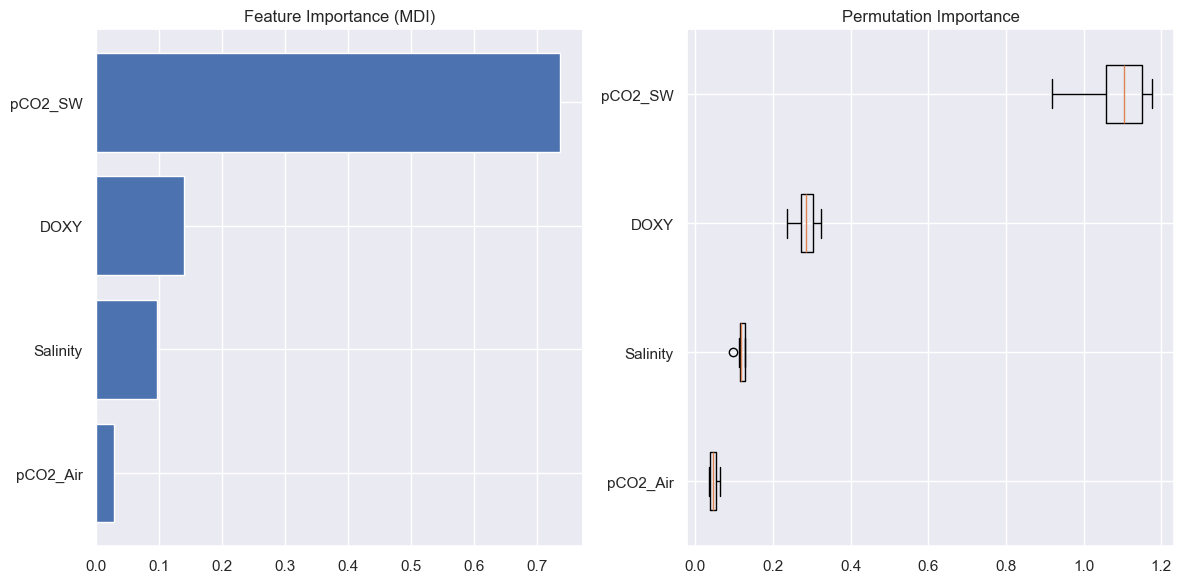

In [315]:
##########################
# Gradient Boost Regressor
##########################

reg = GradientBoostingRegressor(random_state=0)
reg = reg.fit(train_ocean_x, train_ocean_y)

y_gbr_pred_test = reg.predict(test_ocean_x)
y_gbr_pred_train = reg.predict(train_ocean_x)


#Calculate Mean Squared Error
mse_gbr_train = mean_squared_error(train_ocean_y, y_gbr_pred_train)
mse_gbr_test = mean_squared_error(test_ocean_y, y_gbr_pred_test)

# Calculate R-squared
r2_gbr_train = r2_score(train_ocean_y, y_gbr_pred_train)
r2_gbr_test = r2_score(test_ocean_y, y_gbr_pred_test)

print("Gradient Boost Regressor: ")
print('Train Mean Squared Error:', mse_gbr_train)
print('Train R-squared:', r2_gbr_train)
print('Test Mean Squared Error:', mse_gbr_test)
print('Test R-squared:', r2_gbr_test)

feature_importance = reg.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(train_ocean_x.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, test_ocean_x, test_ocean_y, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    tick_labels=np.array(train_ocean_x.columns)[sorted_idx],
)
plt.title("Permutation Importance")
fig.tight_layout()
plt.show()


### Results and Analysis

Looking at the Partial Regression plots from the linear model, it is clear that the feature that has the greatest impact on pH in the model is the sea water partial pressure (pCO2_SW). There is a greater slope in the regression line as CO2_SW increases. The Decision Tree and Gradient Boost Regression plots for feature and permuation importance also both indicate the stregth of the relationship in the model. Both show dissolved oxygen (DOXY) to be the next greatest feature of importance.

The metrics used in comparing the three alogrithms were mean squared error and R-squared score. These are good metrics to use when evaluating regression model performance. Mean squared values were computed for test an train sets for each algorithm. All algorithms performed decently well, however, the Gradient Boost Regression algorithm did the best, it had the lowest mean squared error and highest R squared values. The code below graphs this information. 

|Mean Squared Error |	|	|
|:---------|:-------------|:---|
| 	|Train| Test	|
|Linear Regression |	0.00019| 	0.00021|
|Decision Tree Regression |	0.00009| 	0.00023|
|Gradient Boost Regression |	0.00006| 	0.00012|

|R-Squared |	|	|
|:---------|:-------------|:---|
| 	|Train| Test	|
|Linear Regression |	0.7704| 	0.7767|
|Decision Tree Regression |	0.8918| 	0.7462|
|Gradient Boost Regression |	0.9333| 	0.8681|




Due to the observation that the sea water CO2 partial pressure showed such importance in the models, I went back and created a single parameter model using the three algorithms. Below are the performance metrics:

|Mean Squared Error |	|	|
|:---------|:-------------|:---|
| 	|Train| Test	|
|Linear Regression |	0.00026| 	0.00026|
|Decision Tree Regression |	0.00021| 	0.00031|
|Gradient Boost Regression |	0.00019| 	0.00030|

|R-Squared |	|	|
|:---------|:-------------|:---|
| 	|Train| Test	|
|Linear Regression |	0.7026| 	0.7179|
|Decision Tree Regression |	0.7551| 	0.6634|
|Gradient Boost Regression |	0.7767| 	0.6762|

The performance was not as good with the single parameter model, and it was a little less obvious which algorithm had the optimum performance. Looking at the test data, the Linear Regression algorithm gave the lowest MSE and the highest R-squared value. The code and a comparison chart for this analysis are below.


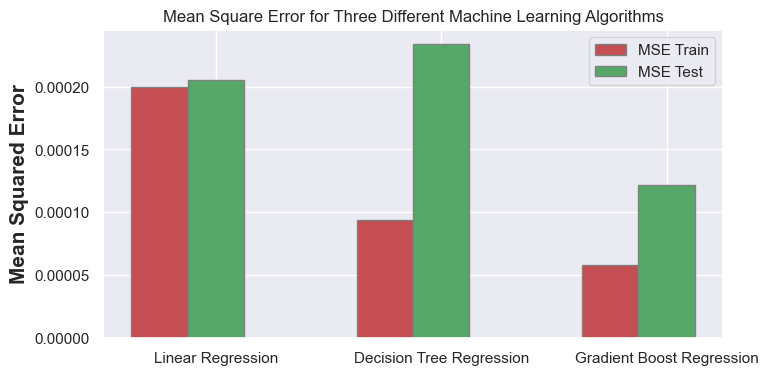

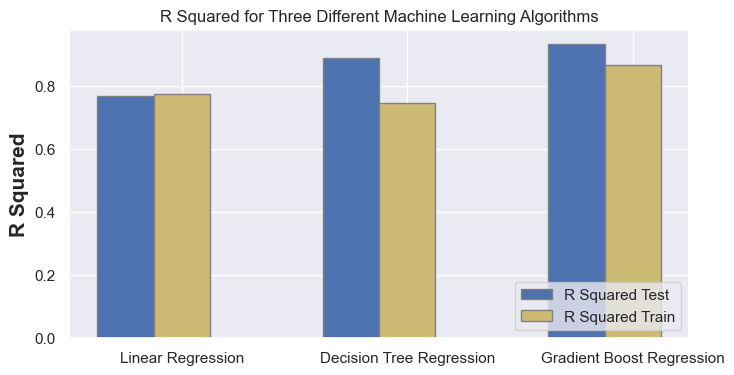

In [334]:

#############################
# Create Bar Chart for MSE and R squared Comparison
#############################

# Store Metrics from 3 models for test and train
algo = ["Linear Regression","Decision Tree Regression","Gradient Boost Regression"]
mse_test = [mse_lm_test, mse_dtr_test, mse_gbr_test]
mse_train = [mse_lm_train, mse_dtr_train, mse_gbr_train]
r2_test = [r2_lm_test, r2_dtr_test, r2_gbr_test]
r2_train = [r2_lm_train, r2_dtr_train, r2_gbr_train]

# Create Bar Chart for MSE
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4)) 

# Set position of bar on X axis 
br1 = np.arange(len(mse_test)) 
br2 = [x + barWidth for x in br1] 

# Make the plot
plt.bar(br1, mse_train, color ='r', width = barWidth, 
        edgecolor ='grey', label ='MSE Train') 
plt.bar(br2, mse_test, color ='g', width = barWidth, 
        edgecolor ='grey', label ='MSE Test') 

# Adding Labels 
plt.ylabel('Mean Squared Error', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(mse_test))],algo)
plt.title("Mean Square Error for Three Different Machine Learning Algorithms")

plt.legend()
plt.show() 


# Create Bar Chart for R squared

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4)) 

# Set position of bar on X axis 
br1 = np.arange(len(r2_test)) 
br2 = [x + barWidth for x in br1] 

# Make the plot
plt.bar(br1, r2_train, color ='b', width = barWidth, 
        edgecolor ='grey', label ='R Squared Train') 
plt.bar(br2, r2_test, color ='y', width = barWidth, 
        edgecolor ='grey', label ='R Squared Test') 

# Adding Labels 
plt.ylabel('R Squared', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(r2_test))],algo)
plt.title("R Squared for Three Different Machine Learning Algorithms")
plt.legend(loc='lower right')
plt.show() 




                            OLS Regression Results                            
Dep. Variable:                     pH   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2960.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:33:03   Log-Likelihood:                 3403.0
No. Observations:                1255   AIC:                            -6802.
Df Residuals:                    1253   BIC:                            -6792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3791      0.007   1284.148      0.0

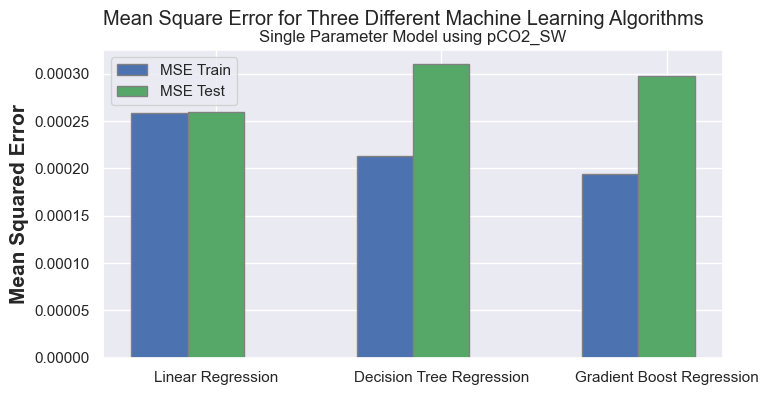

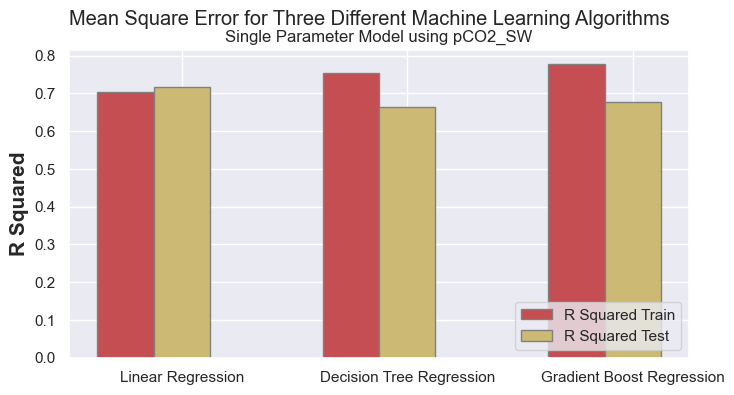

In [349]:
######################
# Running models with only pCO_SW parameter
######################

train_ocean_x_pCO2SW = train_ocean_x['pCO2_SW']
test_ocean_x_pCO2SW = test_ocean_x['pCO2_SW']


#plt.scatter(train_ocean_x_pCO2SW, train_ocean_y)
# Linear Reg
lm_pCO2SW = smf.ols(formula = 'pH ~ pCO2_SW', data=train_ocean).fit()
print(lm_pCO2SW.summary())

# LM Predict
y_lm_pred_train_pCO2SW = lm_pCO2SW.predict(train_ocean_x_pCO2SW)
y_lm_pred_test_pCO2SW = lm_pCO2SW.predict(test_ocean_x_pCO2SW)

train_ocean_x_pCO2SW = train_ocean_x_pCO2SW.to_numpy()
test_ocean_x_pCO2SW = test_ocean_x_pCO2SW.to_numpy()


# LM R-squared / Mean Squared Error
r2_lm_train_pCO2SW = r2_score(train_ocean_y , y_lm_pred_train_pCO2SW)
r2_lm_test_pCO2SW = r2_score(test_ocean_y , y_lm_pred_test_pCO2SW)
mse_lm_train_pCO2SW = mean_squared_error(train_ocean_y, y_lm_pred_train_pCO2SW)
mse_lm_test_pCO2SW = mean_squared_error(test_ocean_y, y_lm_pred_test_pCO2SW)


#Decision Tree Reg 
dtr_pCO2SW = tree.DecisionTreeRegressor()
dtr_pCO2SW = dtr.fit(train_ocean_x_pCO2SW.reshape(-1, 1), train_ocean_y)

# DTR Predict
y_dtr_pred_train_pCO2SW = dtr_pCO2SW.predict(train_ocean_x_pCO2SW.reshape(-1, 1))
y_dtr_pred_test_pCO2SW = dtr_pCO2SW.predict(test_ocean_x_pCO2SW.reshape(-1, 1))


# DTR R-squared / Mean Squared Error
mse_dtr_train_pCO2SW = mean_squared_error(train_ocean_y , y_dtr_pred_train_pCO2SW)
mse_dtr_test_pCO2SW = mean_squared_error(test_ocean_y, y_dtr_pred_test_pCO2SW)
r2_dtr_train_pCO2SW = r2_score(train_ocean_y , y_dtr_pred_train_pCO2SW)
r2_dtr_test_pCO2SW = r2_score(test_ocean_y , y_dtr_pred_test_pCO2SW)

# Gradient Boost Reg
reg_pCO2SW = GradientBoostingRegressor(random_state=0)
reg_pCO2SW = reg_pCO2SW.fit(train_ocean_x_pCO2SW.reshape(-1, 1), train_ocean_y)

# GBR Predict
y_gbr_pred_train_pCO2SW = reg_pCO2SW.predict(train_ocean_x_pCO2SW.reshape(-1, 1))
y_gbr_pred_test_pCO2SW = reg_pCO2SW.predict(test_ocean_x_pCO2SW.reshape(-1, 1))


# GBE R-squared / Mean Squared Error
mse_gbr_train_pCO2SW = mean_squared_error(train_ocean_y , y_gbr_pred_train_pCO2SW)
mse_gbr_test_pCO2SW = mean_squared_error(test_ocean_y, y_gbr_pred_test_pCO2SW)
r2_gbr_train_pCO2SW = r2_score(train_ocean_y , y_gbr_pred_train_pCO2SW)
r2_gbr_test_pCO2SW = r2_score(test_ocean_y , y_gbr_pred_test_pCO2SW)

print()
print()
print("Single Parameter Performance- pCO2_SW")
print("Linear Regression")
print("MSE train/test: ", mse_lm_train_pCO2SW, mse_lm_test_pCO2SW)
print("R squared train/test: " ,r2_lm_train_pCO2SW, r2_lm_test_pCO2SW)
print("Decision Tree Regression")
print("MSE train/test: ", mse_dtr_train_pCO2SW, mse_dtr_test_pCO2SW)
print("R squared train/test: " ,r2_dtr_train_pCO2SW, r2_dtr_test_pCO2SW)
print("Gradient Boost Regression")
print("MSE train/test: ", mse_gbr_train_pCO2SW, mse_gbr_test_pCO2SW)
print("R squared train/test: " ,r2_gbr_train_pCO2SW, r2_gbr_test_pCO2SW)


#####
# Plotting Results for single parameter model
#####


#############################
# Create Bar Chart for MSE and R squared Comparison
#############################

# Store Metrics from 3 models for test and train
mse_test_pCO2SW = [mse_lm_test_pCO2SW, mse_dtr_test_pCO2SW, mse_gbr_test_pCO2SW]
mse_train_pCO2SW = [mse_lm_train_pCO2SW, mse_dtr_train_pCO2SW, mse_gbr_train_pCO2SW]
r2_test_pCO2SW = [r2_lm_test_pCO2SW, r2_dtr_test_pCO2SW, r2_gbr_test_pCO2SW]
r2_train_pCO2SW = [r2_lm_train_pCO2SW, r2_dtr_train_pCO2SW, r2_gbr_train_pCO2SW]

# Create Bar Chart for MSE
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4)) 

# Set position of bar on X axis 
br1 = np.arange(len(mse_test_pCO2SW)) 
br2 = [x + barWidth for x in br1] 

# Make the plot
print()
print()
plt.bar(br1, mse_train_pCO2SW, color ='b', width = barWidth, 
        edgecolor ='grey', label ='MSE Train') 
plt.bar(br2, mse_test_pCO2SW, color ='g', width = barWidth, 
        edgecolor ='grey', label ='MSE Test') 

# Adding Labels 
plt.ylabel('Mean Squared Error', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(mse_test))],algo)
plt.suptitle("Mean Square Error for Three Different Machine Learning Algorithms")
plt.title("Single Parameter Model using pCO2_SW")
plt.legend()
plt.show() 


# Create Bar Chart for R squared

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(8, 4)) 

# Set position of bar on X axis 
br1 = np.arange(len(r2_test_pCO2SW)) 
br2 = [x + barWidth for x in br1] 

# Make the plot
plt.bar(br1, r2_train_pCO2SW, color ='r', width = barWidth, 
        edgecolor ='grey', label ='R Squared Train') 
plt.bar(br2, r2_test_pCO2SW, color ='y', width = barWidth, 
        edgecolor ='grey', label ='R Squared Test') 

# Adding Labels 
plt.ylabel('R Squared', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(r2_test_pCO2SW))],algo)
plt.suptitle("Mean Square Error for Three Different Machine Learning Algorithms")
plt.title("Single Parameter Model using pCO2_SW")
plt.legend(loc='lower right')
plt.show() 


### Conclusion

In this project I used three different machine learning algorithms to model the effect of different variables on ocean water pH. I used Linear Regression, Decision Tree Regression and Gradient Boost Regression and computed mean squared error and R-squared scores as a means for evaluation. All models performed well, but the Gradient Boost Regression algorithm showed to be very good at predicting pH levels with a multi-parametric model. The Linear Regression algorithm did well with a single parameter.  These algorithms could be effective tools in forecasting trends and help researchers and policy makers gain understanding in ocean acidification. In my analysis, the partial pressure of CO2 in the sea water was shown to be the most crucial parameter for the models. However, the using multilple parameters led to a better fit. For future improvements, a more scientific knowledge of additional parameters to use and interaction to investigate may be needed. Another future improvement could be to find projection data for ocean water pCO2 levels and use the models to predict changes in ocean water pH levels.

This project shows the potential and relative ease of these algorithms to be useful tools for forecasting, whether for environmental causes or other regression prediction applications.   